In [28]:
import numpy as np
import pandas as pd

In [4]:
# lets have a look into our dataset:
# link to the dataset: https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature

df = pd.read_csv("measures_v2.csv")
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [8]:
# we want to predict the Permanent magnet temperature (in °C) this information is stored in column pm
# also we want to remove the column of 'profile_id' to simplify and remove the time component in our model
df = df.drop(columns=["profile_id"])
X = df.loc[:, df.columns != 'pm']
y = df["pm"]

In [9]:
X.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,18.326662,19.850639,0.208197


In [7]:
y.head()

0    24.554214
1    24.538078
2    24.544693
3    24.554018
4    24.565397
Name: pm, dtype: float64

In [11]:
# now we split our data into a train test split using sklearn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1337)

In [12]:
# now we create a simple xgboost regressor for this regression task.
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


MSE: 6.932819018488115


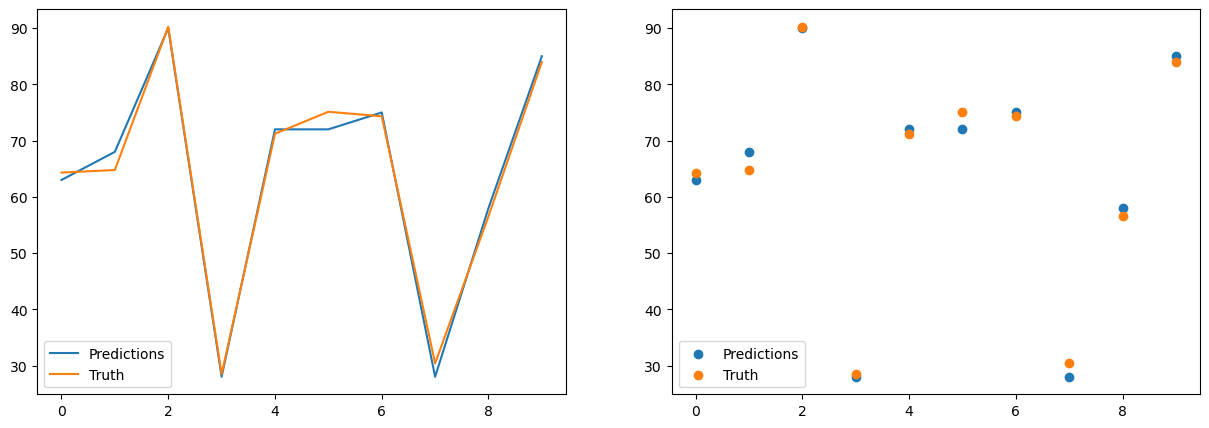

In [48]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# here we get our predictions for the test set:
y_predictions = model.predict(X_test)
y_predictions = [round(value) for value in y_predictions]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
samples = 10

# lets look at the first samples as a lineplot:
axes[0].plot(np.arange(len(y_predictions))[:samples], y_predictions[:samples], label="Predictions")
axes[0].plot(np.arange(len(y_test))[:samples], y_test[:samples], label="Truth")
axes[0].legend()

# lets look at the first samples as a scatterplot:
axes[1].scatter(np.arange(len(y_predictions))[:samples], y_predictions[:samples], label="Predictions")
axes[1].scatter(np.arange(len(y_test))[:samples], y_test[:samples], label="Truth")
axes[1].legend()

# and print out the mse:
mse = mean_squared_error(y_test, y_predictions)
print(f"MSE: {mse}")